In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [59]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,title_len
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,34
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,35
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,31
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,48


In [78]:
df.isnull().sum().sort_values(ascending=False)

title_len                         0
availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_id                           0
dtype: int64

In [112]:
df['reviews_per_month'].fillna(0,inplace=True)
df.drop('last_review',axis=1,inplace=True)
df['title_len']=df['name'].map(str).apply(len)
df.drop(['host_name','name','id'],axis=1,inplace=True)
df['title_len'].fillna(0,inplace=True)

In [84]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Rossville                1
Willowbrook              1
New Dorp                 1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

In [80]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [82]:
df.groupby('neighbourhood_group').mean()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,title_len
neighbourhood_group,,,,,,,,,,
Bronx,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.475655,2.233731,165.758937,34.018332
Brooklyn,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.049790,2.284371,100.232292,36.632710
Manhattan,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,0.976782,12.791330,111.979410,37.375560
Queens,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.567076,4.060184,144.451818,36.589658
Staten Island,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.576381,2.319035,199.678284,36.839142


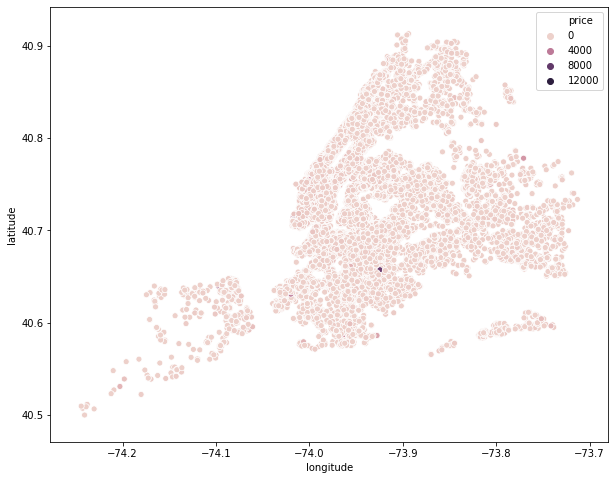

In [141]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='price',cmap = plt.get_cmap('jet'))

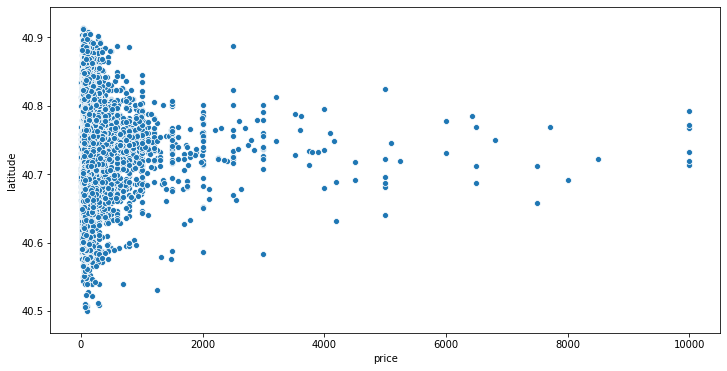

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='latitude',data=df)

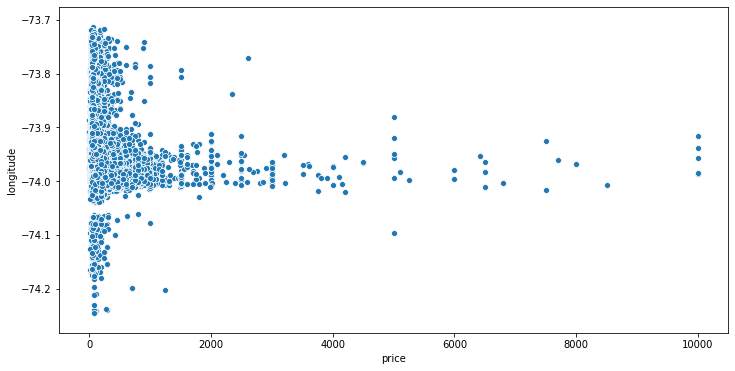

In [65]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='longitude',data=df)

In [69]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[489:]

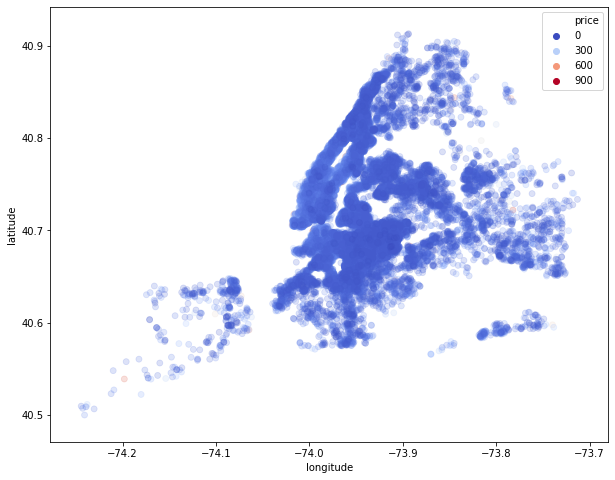

In [146]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude',y='latitude',data=non_top_1_perc,edgecolor = None,alpha=0.2,palette='coolwarm',hue='price')

In [114]:
df.drop('neighbourhood_group',axis=1,inplace=True)

In [123]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,title_len,Entire home/apt,Private room,Shared room
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,34,0,1,0
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,21,1,0,0
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,35,0,1,0
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,31,1,0,0
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,48,1,0,0


In [115]:
nga =pd.get_dummies(df['room_type'])

In [116]:
df = pd.concat([df,nga],axis=1)

In [118]:
df.drop('room_type',axis=1,inplace=True)

In [122]:
df.drop('host_id',axis=1,inplace=True)

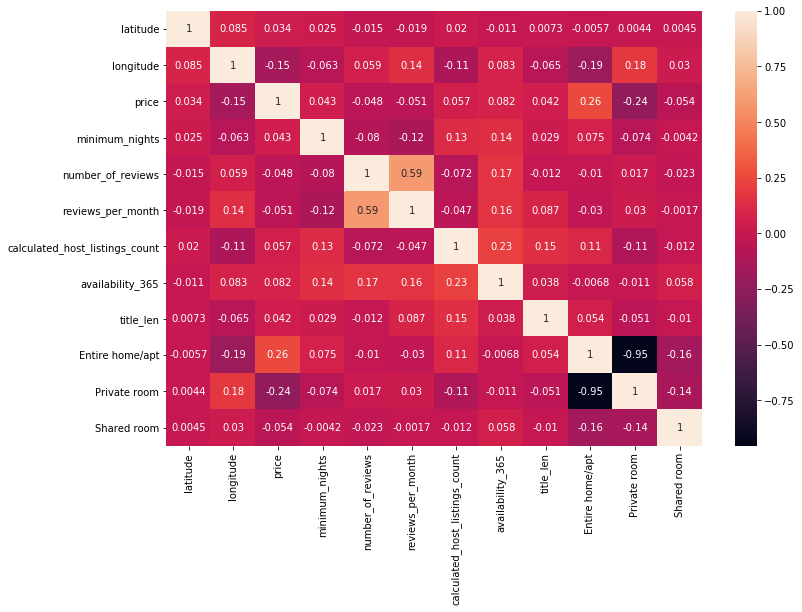

In [127]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

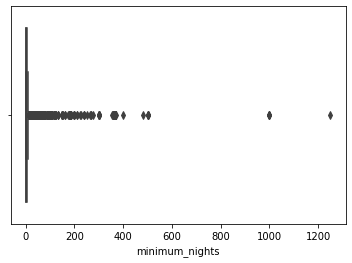

In [128]:
sns.boxplot(x='minimum_nights',data=df)

In [134]:
df[df['minimum_nights']>300]

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,title_len,Entire home/apt,Private room,Shared room
700,Chelsea,40.74618,-74.00392,195,365,10,0.12,1,0,35,1,0,0
754,Midtown,40.75282,-73.97315,125,365,19,0.21,1,365,35,1,0,0
1305,Bushwick,40.70202,-73.92402,115,370,6,0.09,1,365,35,1,0,0
1449,Chelsea,40.75164,-73.99425,135,365,0,0.00,1,365,34,1,0,0
2150,Park Slope,40.67359,-73.97434,100,365,1,0.01,1,365,28,1,0,0
2214,Midtown,40.75879,-73.96380,220,360,1,0.02,1,0,35,1,0,0
2831,Gramercy,40.73494,-73.98751,250,365,0,0.00,1,365,32,1,0,0
2854,Battery Park City,40.71239,-74.01620,400,1000,0,0.00,1,362,3,1,0,0
3398,West Village,40.73858,-74.00875,500,365,0,0.00,1,0,29,0,1,0
3945,Financial District,40.70781,-74.00701,130,365,6,0.10,1,262,34,1,0,0


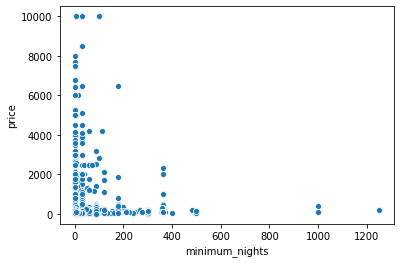

In [132]:
sns.scatterplot(x='minimum_nights',y='price',data=df)

In [137]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [148]:
sub =df[df['price']<500]

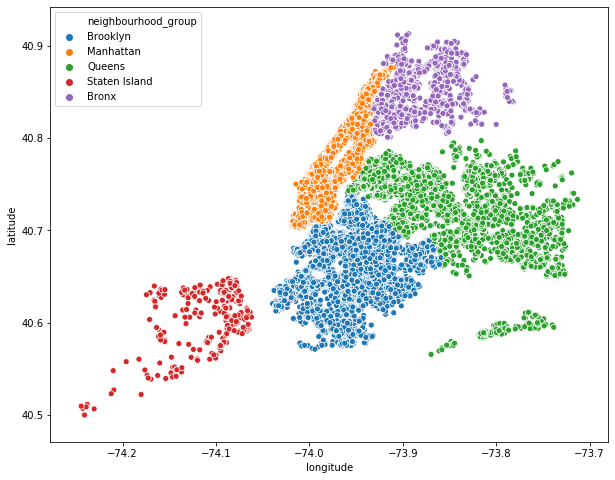

In [153]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude',y='latitude',data=sub,hue='neighbourhood_group',cmap = 'coolwarm')

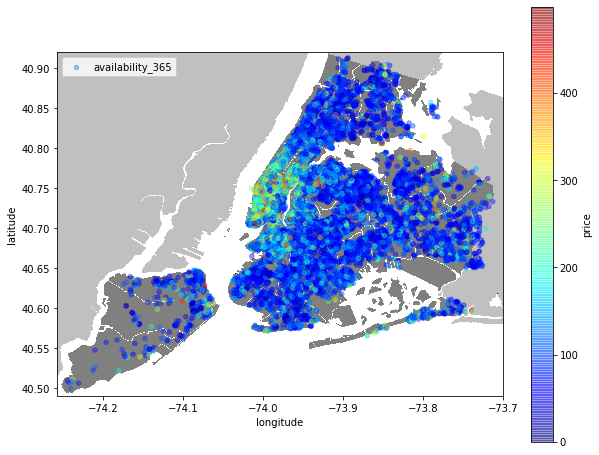

In [154]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [5]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

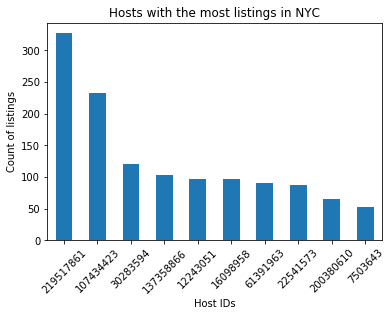

In [6]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)